In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
data.drop(["Unnamed: 0"],axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


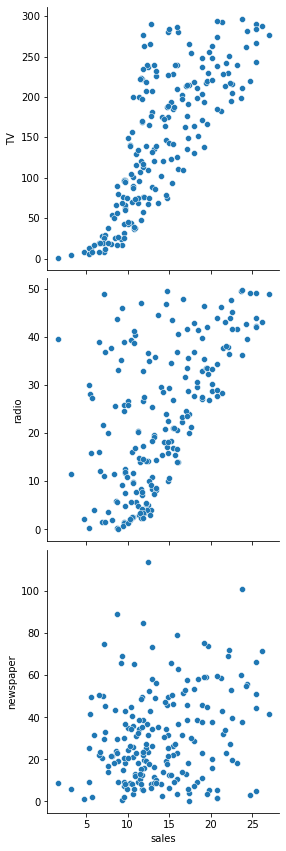

In [47]:
sns.pairplot(data,x_vars="sales",y_vars=["TV","radio","newspaper"],size=4)

In [39]:
x = data[['TV','radio','newspaper']]
y = data['sales'].values.reshape(-1,1)

In [43]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)
reg.fit(X_train,y_train)

LinearRegression()

In [46]:
print("slope ",reg.coef_)
print("intercept ",reg.intercept_)

slope  [[0.04405928 0.1992875  0.00688245]]
intercept  [2.70894909]


In [50]:
print("slope is y = {:.5}*tv + {:.5}*radio+{:.5}*newpaper+{:.5}".format(reg.coef_[0][0],reg.coef_[0][1],reg.coef_[0][2],reg.intercept_[0]))

slope is 0.044059*tv + 0.19929*radio+0.0068825*newpaper+2.7089


In [51]:
y_pred = reg.predict(X_test)
print("mean absolute error ",mean_absolute_error(y_pred,y_test))
print("mean Squarred error ",mean_squared_error(y_pred,y_test))
print("root mean squarred "),np.sqrt(mean_squared_error(y_pred,y_test))

mean absolute error  1.5116692224549084
mean Squarred error  3.7967972367152183
root mean squarred 


(None, 1.9485372043446383)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


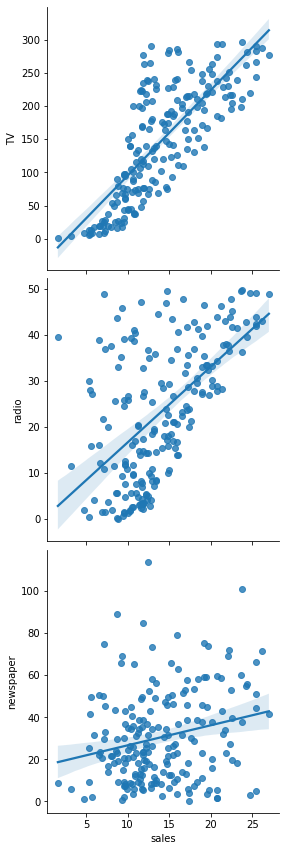

In [52]:

sns.pairplot(data,x_vars="sales",y_vars=["TV","radio","newspaper"],size=4,kind="reg")
